# Laboratorium 6 - Rozwiązywanie układów równań liniowych


##### Aleksandra Mazur

## Zadanie 1 Metoda Gaussa - Jordana

#### Napisz i sprawdź funkcję rozwiązującą układ równań liniowych n × n metodą Gaussa - Jordana. Dla rozmiarów macierzy współczynników większych niż 500 × 500 porównaj czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

**Metoda eliminacji Gaussa - Jordana** to algorytm rozwiązywania układów równań liniowych, wykorzystujący operacje elementarne.

In [1]:
import numpy as np
import time
import scipy.linalg
import random

Poniżej zaimplementowano wcześniej wspomniany algorytm. Funkcja ***gauss_jordan*** przyjmuje dwa argumenty: macierz współczynników *A* oraz wektor wyrazów wolnych *B*, a zwraca wektor będący rozwiązaniem równania $A * X = B$.

In [2]:
def gauss_jordan(A, B):
    AB = np.append(A, B, axis=1)
    n = len(A)
    
    for i in range(n):
        AB[i] /= np.max(AB[i])
        
    for i in range(n):
        j = i
        while j < n and AB[j, i] == 0:
            j += 1
            
        if j == n:
            return False

        AB[[j, i]] = AB[[i, j]]
        for k in range(n):
            if k != i:
                p = AB[k, i] / AB[i, i]
                AB[k] -= AB[i] * p
                AB[k, i] = 0
                
    for i in range(n):
        AB[i, n] /= AB[i, i]
    
    return AB[:, -1]

Funkcja ***check_time*** przyjmuje cztery argumenty: funkcję, macierz współczynników *A*, wektor wyrazów wolnych *B* oraz wartość logiczną *isLstg*, informującą czy jest to funkcja biblioteczna *numpy.linalg.lstq*, a zwraca wynikowy wektor oraz czas wykonania danej funkcji.

In [3]:
def check_time(function, A, B, isLstq):
    start = time.time()
    if isLstq:
        result = function(A, B, rcond=None)
    else:
        result = function(A, B)
    end = time.time()
    return result, end - start

Funkcja *compare_functions* przyjmuje dwa argumenty: rozmiar macierzy i dokładność. Tworzy ona macierz o danym rozmiarze i losowych wartościach, a następnie mierzy czasy działania trzech funkcji: ***gauss_jordan***, ***numpy.linalg.solve*** oraz ***numpy.linalg.lstsq***. Na końcu sprawdza czy macierze otrzymane z dwóch pierwszych funkcji są takie same, z daną dokładnością.

In [4]:
def compare_functions(size_of_matrix, eps):
    A = np.random.rand(size_of_matrix, size_of_matrix)
    B = np.random.rand(size_of_matrix, 1)
    
    print("Rozmiar macierzy: ", size_of_matrix, " x ", size_of_matrix);
    (GJ_matrix, GJ_time) = check_time(gauss_jordan, A, B, False)
    (LS_matrix, LS_time) = check_time(np.linalg.solve, A, B, False)
    (LL_matrix, LL_time) = check_time(np.linalg.lstsq, A, B, True)
    
    print("Algorytm Gaussa - Jordana: ", GJ_time,"s")
    print("Algorytm numpy.linalg.solve: ", LS_time, "s")
    print("Algorytm numpy.linalg.lstsq: ", LL_time, "s")
    
    same = True
    comparison = abs(GJ_matrix - LS_matrix.T[0]) < eps

    for i in comparison:
        if not i:
            same = False
            break
            
    if same:
        print("Funkcje zwróciły taki sam wynik z dokładnością {}".format(eps))
    else:
        print("Funkcje zwróciły inny wynik")

Poniżej porównano czasy działania funkcji ***gauss_jordan***, ***numpy.linalg.solve*** oraz ***numpy.linalg.lstsq*** dla różnych rozmiarów macierzy o losowych wartościach oraz sprawdzono czy zwracają one ten sam wynik z daną dokładnością.

In [5]:
for n in [500, 600, 700, 800, 900, 1000]:
    compare_functions(n, 10 ** (-7))
    print("\n")

Rozmiar macierzy:  500  x  500
Algorytm Gaussa - Jordana:  1.2995264530181885 s
Algorytm numpy.linalg.solve:  0.014848709106445312 s
Algorytm numpy.linalg.lstsq:  0.03889775276184082 s
Funkcje zwróciły taki sam wynik z dokładnością 1e-07


Rozmiar macierzy:  600  x  600
Algorytm Gaussa - Jordana:  1.9128856658935547 s
Algorytm numpy.linalg.solve:  0.00598454475402832 s
Algorytm numpy.linalg.lstsq:  0.04787111282348633 s
Funkcje zwróciły taki sam wynik z dokładnością 1e-07


Rozmiar macierzy:  700  x  700
Algorytm Gaussa - Jordana:  2.7546374797821045 s
Algorytm numpy.linalg.solve:  0.007977485656738281 s
Algorytm numpy.linalg.lstsq:  0.07978653907775879 s
Funkcje zwróciły taki sam wynik z dokładnością 1e-07


Rozmiar macierzy:  800  x  800
Algorytm Gaussa - Jordana:  3.76294207572937 s
Algorytm numpy.linalg.solve:  0.010970115661621094 s
Algorytm numpy.linalg.lstsq:  0.129652738571167 s
Funkcje zwróciły taki sam wynik z dokładnością 1e-07


Rozmiar macierzy:  900  x  900
Algorytm Gauss

### Wnioski:
* funkcje ***gauss_jordan*** i ***numpy.linalg.solve*** zwracają ten sam wynik z dokładnością $10^{-7}$
* czas działania każdej z trzech funkcji rośnie wraz ze zwiększaniem wymiaru macierzy
* funkcja ***gauss_jordan*** jest znacznie wolniejsza od funkcji bibliotecznych
* funckja ***numpy.linalg.solve*** jest najszybsza, a funkcja ***numpy.linalg.lstsq*** jest około 10-20 razy wolniejsza

## Zadanie 2 Faktoryzacja LU

#### Napisz i sprawdź funkcję dokonującą faktoryzacji A = LU macierzy A. Zastosuj częściowe poszukiwanie elementu wiodącego oraz skalowanie.

Metoda **LU** (lower, upper) to kolejna metoda rozwiązywania układu równań liniowych. Polega ona na rozkładzie pewnej macierzy *A* na macierz dolnotrójkątną *L* oraz górnotrójkątną *U* tak, że **A = LU**.

Poniższa funkcja przyjmuje macierz *U*, jej rozmiar *n* i indeks kolumny *i*, a zwraca indeks wiersza (>= i), w którym jest maksymalna wartość w danej kolumnie.

In [6]:
def find_max_value_index(U, i, n):
    max_index = i
    max_value = U[i, i]
    
    for j in range(i, n):
        if U[j, i] > max_value:
            max_value = U[j, i]
            max_index = j
    return max_index

Funkcja *LU* przyjmuje macierz *A* rozmiaru *n x n* i zwraca macierze dolnotrójkątną *L*, górnotrójkątną *U* oraz macierz skalowania i permutacji *P*. Relację tych macierzy określa następująca zależność: $PA = LU$.

In [7]:
def LU(A):
    n = len(A)
    
    P = np.zeros((n, n))
    np.fill_diagonal(P, 1)
    L = np.zeros((n, n))
    U = A.copy()
     
    # scaling
    for i in range(n):
        P[i, i] = (1 / np.max(U[i]))
        U[i] /= np.max(U[i])
        
    # partial pivoting
    for i in range(n):
        pivot_index = find_max_value_index(U, i, n)
        
        P[[pivot_index, i]] = P[[i, pivot_index]]
        L[[pivot_index, i]] = L[[i, pivot_index]]
        U[[pivot_index, i]] = U[[i, pivot_index]]
        
        for k in range(i + 1, n):
            factor = U[k, i] / U[i, i] 
            U[k] -= U[i] * factor
            U[k, i] = 0.0
            L[k, i] = factor


    np.fill_diagonal(L, 1)

    return P, L, U

In [8]:
def check_time_LU(function, A):
    start = time.time()
    P, L, U = function(A)
    end = time.time()
    return P, L, U, end - start

Poniżej porównano czasy działania funkcji ***LU*** oraz ***scipy.linalg.lu*** dla różnych rozmiarów macierzy oraz sprawdzono czy funkcja *LU* dokonała poprawnie faktoryzacji.

In [9]:
def compare_functions_LU(size_of_matrix):
    A = np.random.rand(size_of_matrix, size_of_matrix)
    
    print("Rozmiar macierzy: ", size_of_matrix, " x ", size_of_matrix);
    (P_1, L_1, U_1, time_1) = check_time_LU(LU, A)
    (P_2, L_2, U_2, time_2) = check_time_LU(scipy.linalg.lu, A.copy())
    
    print("Mój algorytm: ", time_1,"s")
    print("Algorytm z biblioteki scipy: ", time_2, "s")
    print("Iloraz powyższych czasów: ", time_1 / time_2)
    
    if np.allclose(np.matmul(P_1, A), np.matmul(L_1, U_1)):
        print("Wynik jest poprawny")
    else:
        print("Wynik nie jest poprawny")

In [10]:
for n in [500, 600, 700, 800, 900, 1000]:
    compare_functions_LU(n)
    print("\n")

Rozmiar macierzy:  500  x  500
Mój algorytm:  0.6213662624359131 s
Algorytm z biblioteki scipy:  0.011270284652709961 s
Iloraz powyższych czasów:  55.133147172685156
Wynik jest poprawny


Rozmiar macierzy:  600  x  600
Mój algorytm:  0.995337963104248 s
Algorytm z biblioteki scipy:  0.009975433349609375 s
Iloraz powyższych czasów:  99.77891969407266
Wynik jest poprawny


Rozmiar macierzy:  700  x  700
Mój algorytm:  1.4082350730895996 s
Algorytm z biblioteki scipy:  0.013964653015136719 s
Iloraz powyższych czasów:  100.84282592364953
Wynik jest poprawny


Rozmiar macierzy:  800  x  800
Mój algorytm:  1.8889503479003906 s
Algorytm z biblioteki scipy:  0.020943880081176758 s
Iloraz powyższych czasów:  90.19104103819227
Wynik jest poprawny


Rozmiar macierzy:  900  x  900
Mój algorytm:  2.575115442276001 s
Algorytm z biblioteki scipy:  0.025897502899169922 s
Iloraz powyższych czasów:  99.43489348382464
Wynik jest poprawny


Rozmiar macierzy:  1000  x  1000
Mój algorytm:  3.099285125732422

### Wnioski:
* metoda *LU* dokonała poprawnej faktoryzacji
* metoda *LU* nie wymaga dużej liczby operacji
* dekompozycja macierzy do postaci *LU* może przyspieszyć obliczanie układów równań
* funkcja biblioteczna *scipy.linalg.lu* działa kilkadziesiąt razy szybciej niż zaimplementowana funkcja

## Zadanie 3 Analiza obwodu elektrycznego

#### Napisz program, który:
#### a) Wczytuje z pliku listę krawędzi grafu opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.
#### b) Wczytuje dodatkowo trójkę liczb (s, t, E), przy czym para (s, t) wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny SEM można zaniedbać.
#### c) Wykorzystując prawa Kirchhoffa znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu ważonego z etykietami.
#### e) Wykorzystując metodę potencjałów węzłowych zaimplementuj alternatywne rozwiązanie problemu.
#### f) Przedstaw (wizualizacja + sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 100 wierzchołków:
#### - Spójny graf losowy
#### - Graf 3-regularny (kubiczny)
#### - Graf złożony z dwóch grafów losowych połączonych mostkiem
#### - Graf siatka 2D

Do wykonania tego zadania użyto biblioteki ***networkx*** i przy jej pomocy wygenerowano oraz zapisano grafy. Przyjęto, że prąd płynie od wierzchołka o mniejszym indeksie, do wierzchołka o większym indeksie.

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

Funkcja ***fill_sem_resistance*** przyjmuje graf *G* i wartość logiczną *fill_resistance* informującą o tym, czy wypełnić opór losowymi liczbami. Jeżeli tworzymy macierz z pliku to opór każdej krawędzi będzie dany i wcześniej odpowiednio przypisany. Funkcja uzupełnia SEM na wartość 0, oraz index na odpowiednie liczby.

In [12]:
def fill_sem_resistance(G, fill_resistance):
    for i, (u, v, w) in enumerate (G.edges(data = True)):
        w['sem'] = 0
        w['i'] = i
        if fill_resistance:
            w['resistance'] = np.random.randint(1, 10)
    return G

Funkcja ***get_graph_from_file*** przyjmuje ścieżkę do pliku *path*, w której są krawędzie wraz z wagami (oporem) oraz trójkę liczb *(u_sem, v_sem, sem)*, przy czym para *(u_sem, v_sem)* wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną *sem*. Następnie wczytuje każdą linijkę z pliku, tworzy odpowiedni graf i używa wcześniejszej funkcji. Kolejnym krokiem jest dołączenie do siecie *sem*. Jeżeli podana w argumentach funkcji krawędź nie istnieje, to jest losowana z istniejących, jej opór ustawiony jest na 0 i przypisana zostaje wartość *sem*.

In [13]:
def get_graph_from_file(path, u_sem, v_sem, sem):
    file = open(path, "r")
    G = nx.Graph()
    E = []
    
    for line in file:
        elements = line.split(" ")
        u = int(elements[0])
        v = int(elements[1])
        r = float(elements[2])
        
        if (u > v):
            u, v = v, u
        G.add_edge(u, v, resistance = r)
    
    file.close()
    G = fill_sem_resistance(G, False)
    
    if not G.has_edge(u_sem, v_sem):
        E = random.choice(list(G.edges))
        G.edges[E[0], E[1]]['resistance'] = 0
        G.edges[E[0], E[1]]['sem'] = sem
    else:
        G[u_sem][v_sem]['sem'] = sem
        G[u_sem][v_sem]['resistance'] = 0
        
    pos = nx.spring_layout(G)
    
    return G, pos

Funkcja ***save_graph_to_file*** zapisuje dany graf *G* do pliku o podanej nazwie *path*.

In [14]:
def save_graph_to_file(G, path):
    file = open(path, "w+")
    for (u, v) in G.edges():
        file.write(str(u) + " "+ str(v) + " " + str(G[u][v]['resistance']) + "\n")
    file.close()

In [15]:
def show_file(path):
    file = open(path, "r")
    for line in file:
        elements = line.split(" ")
        print(elements[0], elements[1], float(elements[2]))
    file.close()

In [16]:
file1 = "graph1.txt"
show_file(file1)
G, pos = get_graph_from_file(file1, 1, 2, 10)
print(G.adj)

1 2 3.0
2 3 4.0
3 4 5.0
3 1 2.0
4 5 5.0
5 6 6.0
6 4 1.0
6 1 8.0
1 4 1.0
2 5 3.0
{1: {2: {'resistance': 0, 'sem': 10, 'i': 0}, 3: {'resistance': 2.0, 'sem': 0, 'i': 1}, 6: {'resistance': 8.0, 'sem': 0, 'i': 2}, 4: {'resistance': 1.0, 'sem': 0, 'i': 3}}, 2: {1: {'resistance': 0, 'sem': 10, 'i': 0}, 3: {'resistance': 4.0, 'sem': 0, 'i': 4}, 5: {'resistance': 3.0, 'sem': 0, 'i': 5}}, 3: {2: {'resistance': 4.0, 'sem': 0, 'i': 4}, 4: {'resistance': 5.0, 'sem': 0, 'i': 6}, 1: {'resistance': 2.0, 'sem': 0, 'i': 1}}, 4: {3: {'resistance': 5.0, 'sem': 0, 'i': 6}, 5: {'resistance': 5.0, 'sem': 0, 'i': 7}, 6: {'resistance': 1.0, 'sem': 0, 'i': 8}, 1: {'resistance': 1.0, 'sem': 0, 'i': 3}}, 5: {4: {'resistance': 5.0, 'sem': 0, 'i': 7}, 6: {'resistance': 6.0, 'sem': 0, 'i': 9}, 2: {'resistance': 3.0, 'sem': 0, 'i': 5}}, 6: {5: {'resistance': 6.0, 'sem': 0, 'i': 9}, 4: {'resistance': 1.0, 'sem': 0, 'i': 8}, 1: {'resistance': 8.0, 'sem': 0, 'i': 2}}}


Jak widać funkcja ***get_graph_from_file*** działa poprawnie.

Poniżej znajdują się funkcje tworzące wybrane grafy.

In [17]:
# spójny graf losowy o n wierzchołkach
def random_graph(n):
    G = nx.gnp_random_graph(n, 0.5)
    while not nx.is_connected(G):
        G = nx.gnp_random_graph(n, 0.5)
    G = fill_sem_resistance(G, True)
    return G

# graf 3-regularny (kubiczny)
def cubic_graph(n):
    G = nx.random_regular_graph(3, n)
    while not nx.is_connected(G):
        G = nx.random_regular_graph(3, n)
    G = fill_sem_resistance(G, True)
    return G

# graf złożony z dwóch grafów losowych połączonych mostkiem
def bridge_graph(n):
    G1 = nx.gnp_random_graph(n, 0.5)
    while not nx.is_connected(G1):
        G1 = nx.gnp_random_graph(n, 0.5)
    G2 = nx.gnp_random_graph(n, 0.5)
    while not nx.is_connected(G2):
        G2 = nx.gnp_random_graph(n, 0.5)
    A = random.choice(list(G1.nodes))
    B = random.choice(list(G2.nodes))

    for edge in G2.edges:
        G1.add_edge(edge[0] + n, edge[1] + n)

    G1.add_edge(A, B + n)
    G1 = fill_sem_resistance(G1, True)
    return G1

# graf siatka 2D
def grid_graph(n):
    Gr = nx.grid_graph(dim=[int(np.sqrt(n)), int(np.sqrt(n))])
    G = nx.Graph()
    for (u, v) in Gr.edges:
        G.add_edge(int(np.sqrt(n)) * u[0] + u[1], int(np.sqrt(n)) * v[0] + v[1])
    G = fill_sem_resistance(G, True)
    return G     

Funkcja ***draw_graph*** jak sama nazwa wskazuje, rysuje dany graf. Kolorem niebieskim będzie zaznaczona krawędź z siłą elektromotoryczną *sem*. Z uwagi na czytelność grafu, wagi krawędzi wyświetlono tylko dla grafów o liczbie wierzchołków mniejszej niż 50, a ich wagi odwzorowano przez nasilenie koloru (im większe natężenie prądu płynącego przez krawędź, tym jest grubsza).

In [18]:
def draw_graph(G, pos):
    plt.figure(1, figsize=(15, 15))
    
    # draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='yellow')
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')
    
    # draw edges
    resistances = []
    for (u, v) in G.edges:
        resistances.append(G[u][v]['resistance'])

    unique_resistance = list(set(resistances))

    for res in unique_resistance:
        sem_edges = []
        another_edges = []
        for (u, v) in G.edges:
            if G[u][v]['sem'] != 0 and G[u][v]['resistance'] == res:
                sem_edges.append((u, v))
            elif G[u][v]['sem'] == 0 and G[u][v]['resistance'] == res:
                another_edges.append((u, v))
        
        width = res * len(G.nodes) / sum(resistances)
        nx.draw_networkx_edges(G, pos, edgelist = sem_edges, width = 1, edge_color='blue')
        nx.draw_networkx_edges(G, pos, edgelist = another_edges, width = width, edge_color='black')
    
    # add resistance
    if len(G) < 50:
        labels = {}
        for (u, v) in G.edges:
            labels[(u, v)] = G[u][v]['resistance']

        nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, font_color='red')
    
    plt.axis('off')
    plt.show()

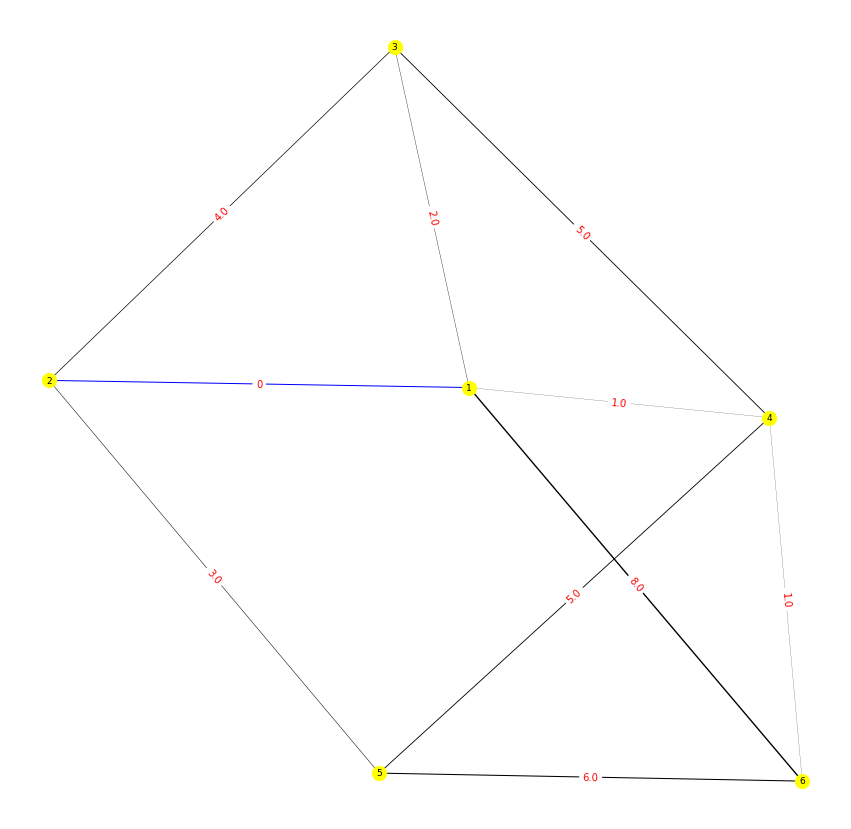

In [19]:
draw_graph(G, pos)

Jak widać graf został narysowany poprawnie.

Funkcja ***kirchoff_I*** przyjmuje jako parametr graf *G* i rozwiązuje układ równań wynikający z pierwszego prawa Kirchoffa. Otrzyma ona tyle równań, ile jest węzłów w grafie.

In [20]:
def kirchoff_I(G):
    A = np.zeros((len(G.edges) + 1, len(G.edges)))
    
    for u in G.nodes:
        for v in nx.all_neighbors(G, u):
            if u < v:
                val = 1
            else:
                val = -1
            A[u][G[u][v]['i']] = val

    return A

Funkcja ***kirchoff_II***, aby wyliczyć równania wynikające z drugiego prawa Kirchoffa, korzysta z funkcji *cycle_basis* z wcześniej wspomnianej biblioteki. Zwraca ona minimalny zbiór cykli taki, że każdy cykl może zostać zapisany jako suma cykli z tego zbioru.

In [21]:
def kirchoff_II(G, A):
    B = np.zeros((len(G.edges) + 1, 1))
    nodes_len = len(G.nodes)   
    
    cycle_number = 0
    for cycle in nx.cycle_basis(G):
        cycle_len = len(cycle)
        sum_sem = 0
        for i in range(cycle_len):
            u = cycle[i]
            v = cycle[(i + 1) % cycle_len]
            sum_sem += G[u][v]['sem']
            
            if u < v:
                val = G[u][v]['resistance']
            else:
                val = - G[u][v]['resistance']
                
            A[cycle_number + nodes_len][G[u][v]['i']] = val
        B[cycle_number + nodes_len] = sum_sem
        cycle_number += 1
    
    return np.linalg.lstsq(A, B, rcond=None)[0]

In [22]:
def kirchoff(G):
    A = kirchoff_I(G)
    I = kirchoff_II(G, A)
    return I

Funckje ***check_kirchoff_I*** i ***check_kirchoff_II*** przyjmują jako argumenty graf *G*, wcześniej obliczone natężenia *I* i dokładność *eps* i sprawdzają czy są spełnione odpowiednie prawa Kirchoffa.

In [23]:
def check_kirchoff_I(G, I, eps = 10 ** (-8)):
    for u in G.nodes:
        counter = 0
        for v in nx.all_neighbors(G, u):
            if u < v:
                x = I[G[u][v]['i']]
            else:
                x = - I[G[u][v]['i']]
            counter += x
            
        if counter > eps:
            return False
        
    return True

In [24]:
def check_kirchoff_II(G, I, eps = 10 ** (-8)):
    cycle_number = 0
    for cycle in nx.cycle_basis(G):
        cycle_len = len(cycle)
        sum_sem = 0
        resistance = 0
        for i in range(cycle_len):
            u = cycle[i]
            v = cycle[(i + 1) % cycle_len]
            sum_sem += G[u][v]['sem']
            
            if  u < v:
                val = I[G[u][v]['i']]
            else:
                val = - I[G[u][v]['i']]
            resistance += G[u][v]['resistance'] * val
            
        if abs(resistance - sum_sem) > eps:
            return False
        cycle_number += 1
        
    return True

In [25]:
def check_kirchoff(G, I):
    if check_kirchoff_I(G, I) and check_kirchoff_II(G, I):
        print("Prawa Kirchoffa są zachowane")
    else:
        print("Prawa Kirchoffa nie są zachowane")

Funkcja ***graph_test*** tworzy graf odpowiedniego typu, używa praw Kirchoffa, aby otrzymać natężenia, sprawdza czy te prawa są zachowane, zapisuje graf do pliku, a następnie go rysuje.

In [26]:
def graph_test(type = 'random', n = 1, u_sem = 0, v_sem = 1, sem = 0):
    if type == 'grid':
        G = grid_graph(n)
    elif type == 'cubic':
        G = cubic_graph(n)
    elif type == 'bridge':
        G = bridge_graph(n)
    else:
        G = random_graph(n)

    if not G.has_edge(u_sem, v_sem):
        E = random.choice(list(G.edges))
        G.edges[E[0], E[1]]['resistance'] = 0
        G.edges[E[0], E[1]]['sem'] = sem
    else:
        G[u_sem][v_sem]['sem'] = sem
        G[u_sem][v_sem]['resistance'] = 0
    
    I = kirchoff(G)
        
    if type == 'cubic':
        pos = nx.circular_layout(G)
    else:
        pos = nx.spring_layout(G)
        
    print(type.upper(), "graph: ")
    path = type + str(n) + ".txt"
    print(path)
    save_graph_to_file(G, path)
    
    check_kirchoff(G, I)
    draw_graph(G, pos)

### Grafy losowe

RANDOM graph: 
random15.txt
Prawa Kirchoffa są zachowane


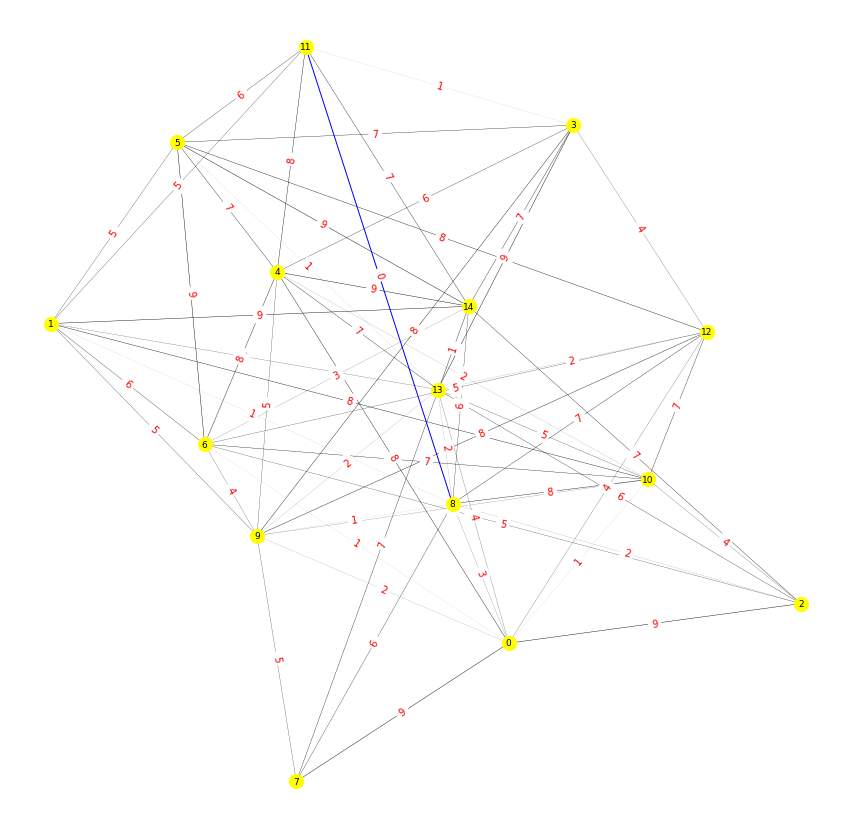

RANDOM graph: 
random50.txt
Prawa Kirchoffa są zachowane


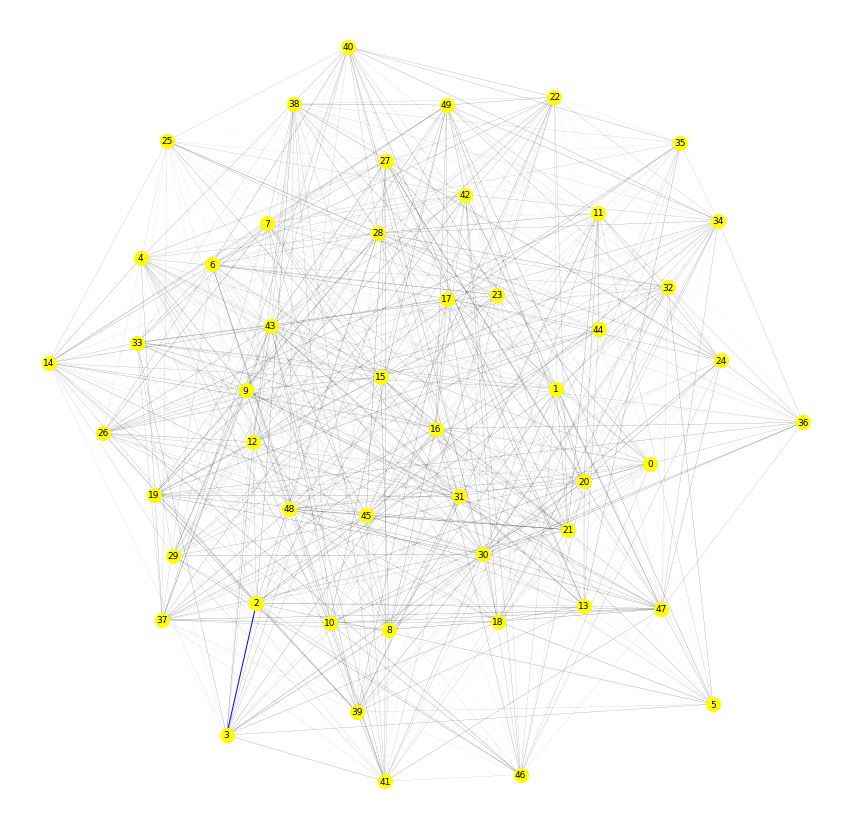

RANDOM graph: 
random100.txt
Prawa Kirchoffa są zachowane


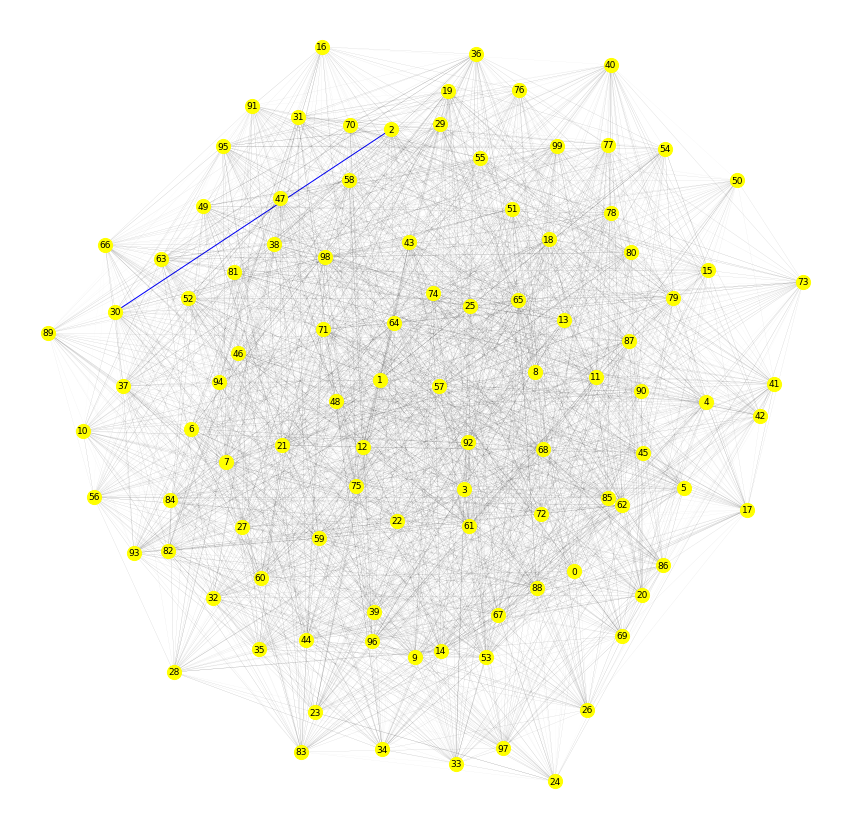

In [27]:
for size in [15, 50, 100]:
    graph_test(type = 'random', n = size, u_sem = 2, v_sem = 3, sem = 15)

### Grafy 3-regularne (kubiczne)

CUBIC graph: 
cubic16.txt
Prawa Kirchoffa są zachowane


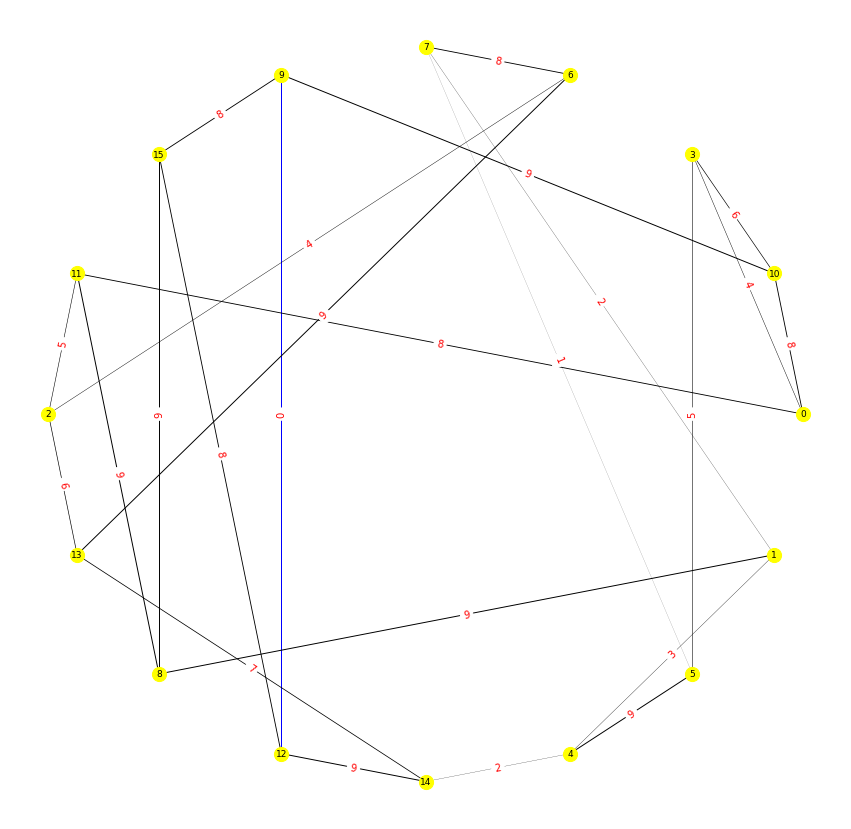

CUBIC graph: 
cubic50.txt
Prawa Kirchoffa są zachowane


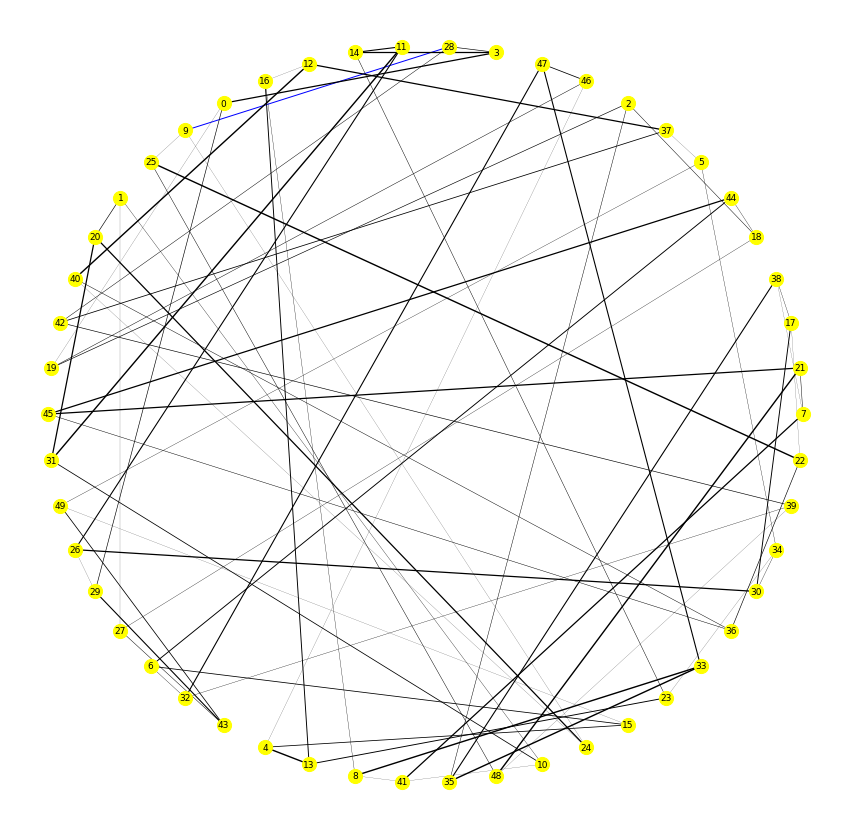

CUBIC graph: 
cubic100.txt
Prawa Kirchoffa są zachowane


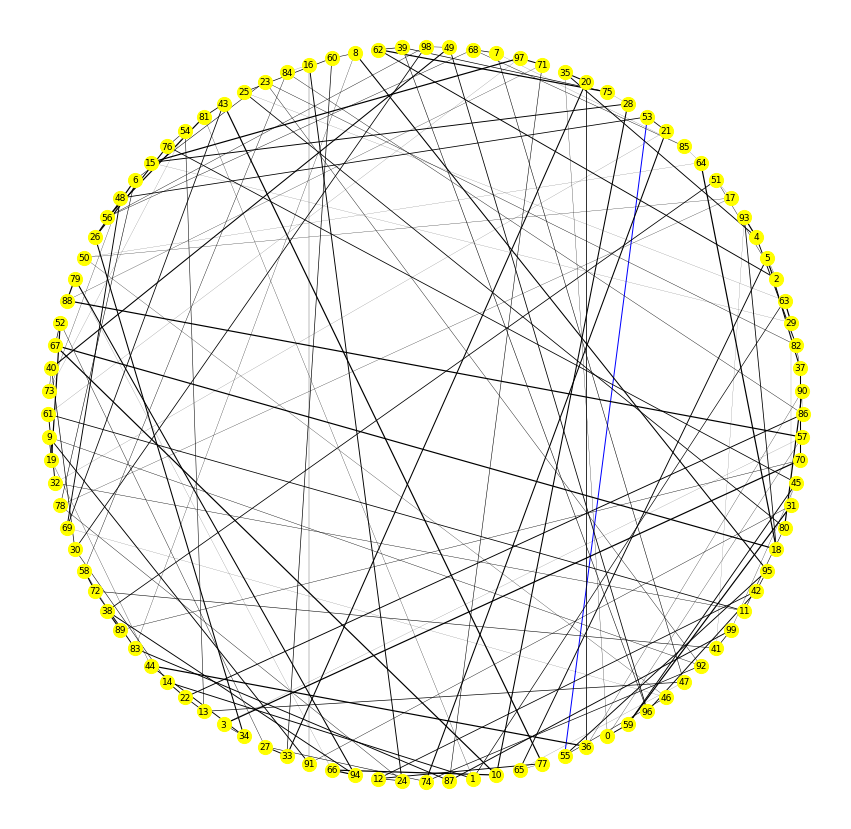

In [28]:
for size in [16, 50, 100]:
    graph_test(type = 'cubic', n = size, u_sem = 2, v_sem = 3, sem = 15)

### Grafy złożone z dwóch grafów losowych połączonych mostkiem

BRIDGE graph: 
bridge7.txt
Prawa Kirchoffa są zachowane


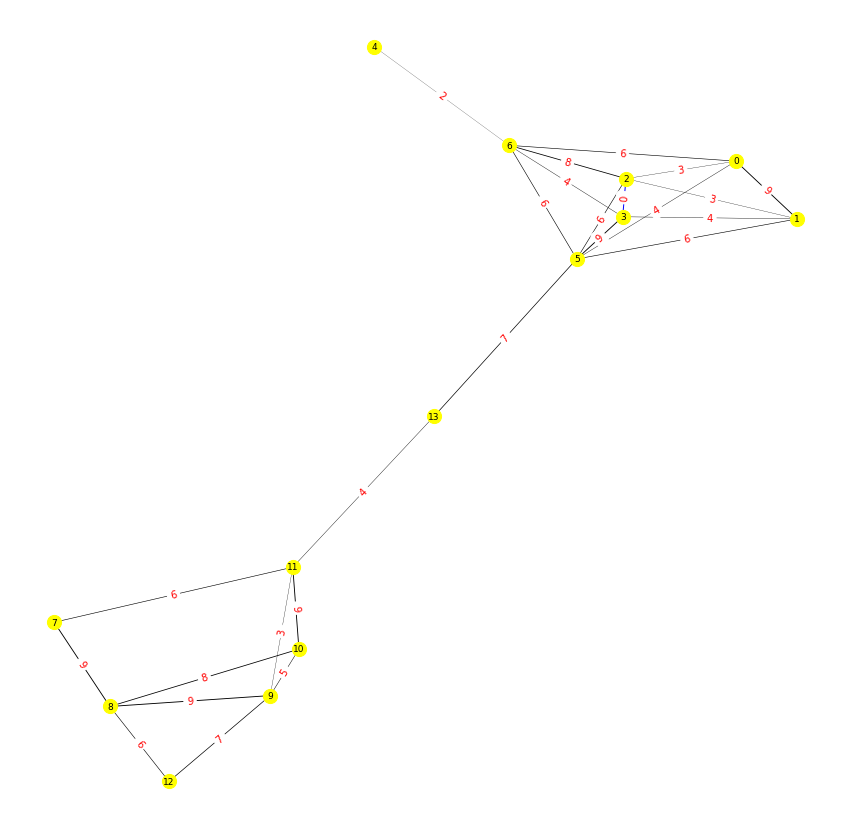

BRIDGE graph: 
bridge25.txt
Prawa Kirchoffa są zachowane


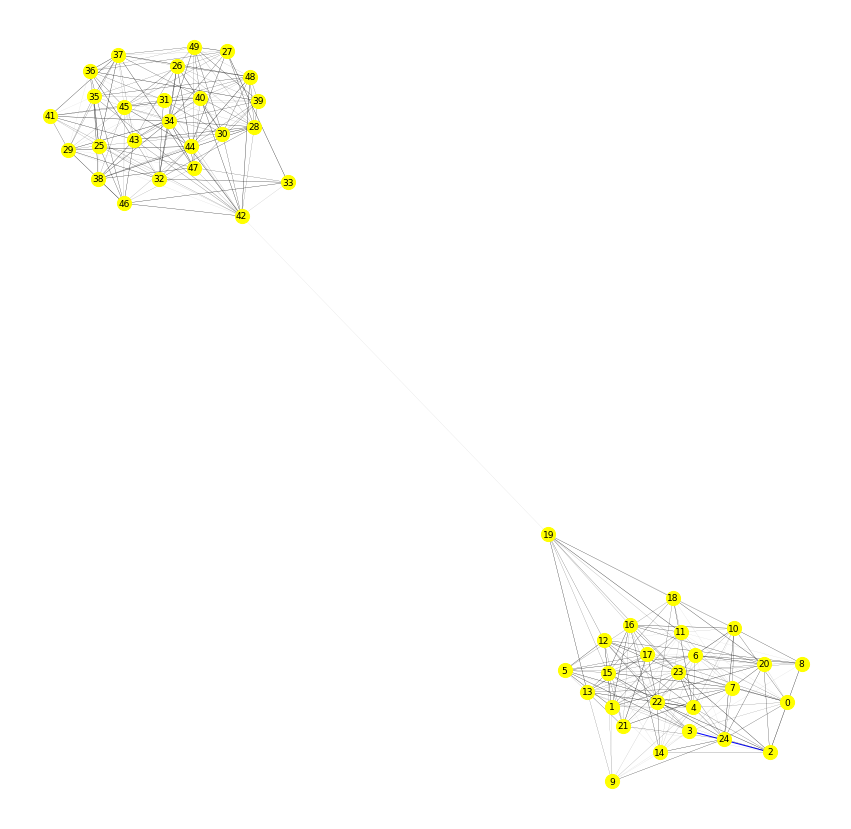

BRIDGE graph: 
bridge50.txt
Prawa Kirchoffa są zachowane


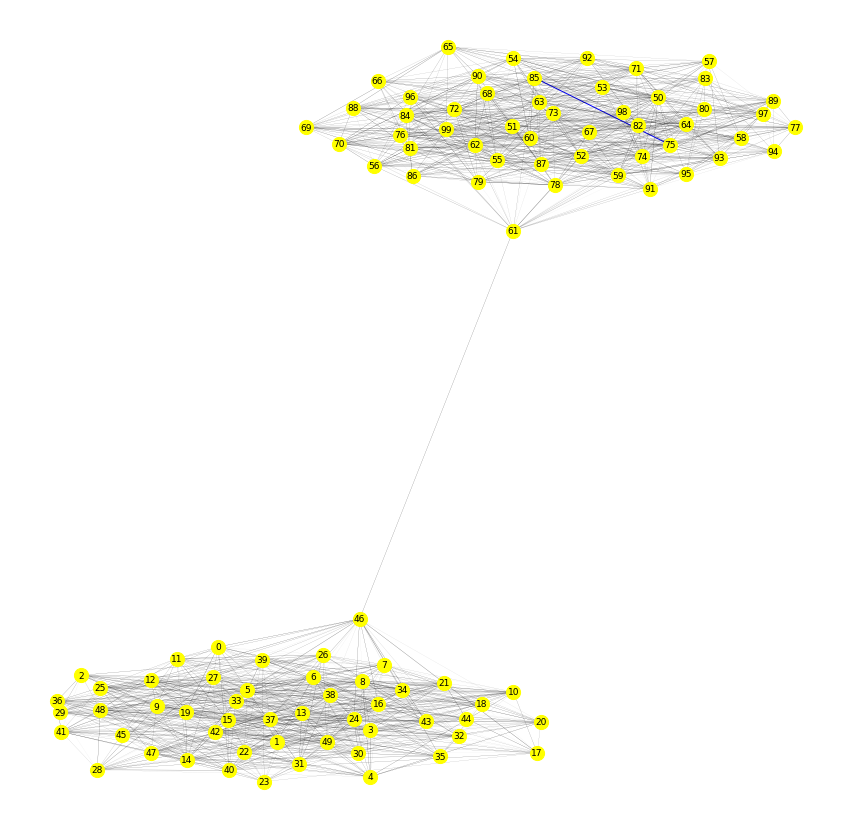

In [29]:
for size in [7, 25, 50]:
    graph_test(type = 'bridge', n = size, u_sem = 2, v_sem = 3, sem = 15)

### Grafy siatka 2D

GRID graph: 
grid15.txt
Prawa Kirchoffa są zachowane


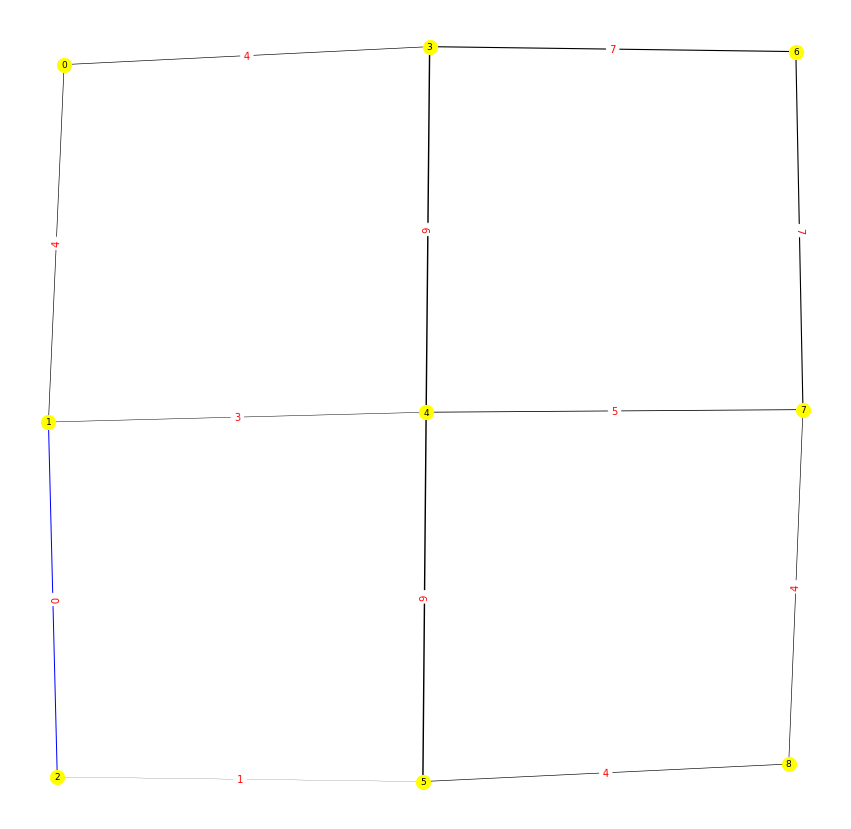

GRID graph: 
grid40.txt
Prawa Kirchoffa są zachowane


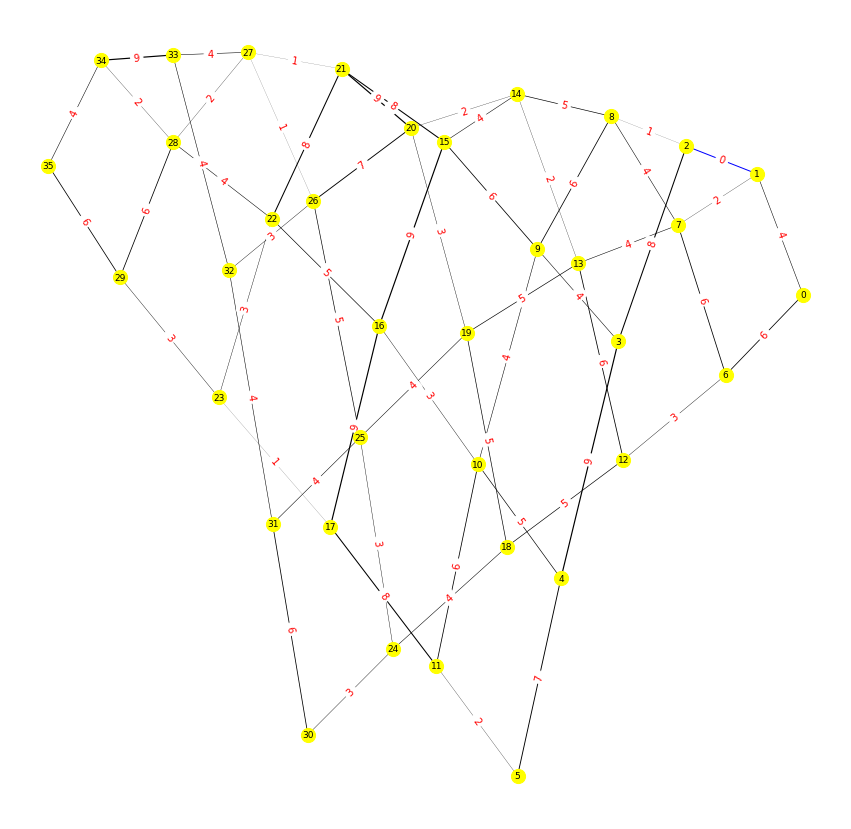

GRID graph: 
grid80.txt
Prawa Kirchoffa są zachowane


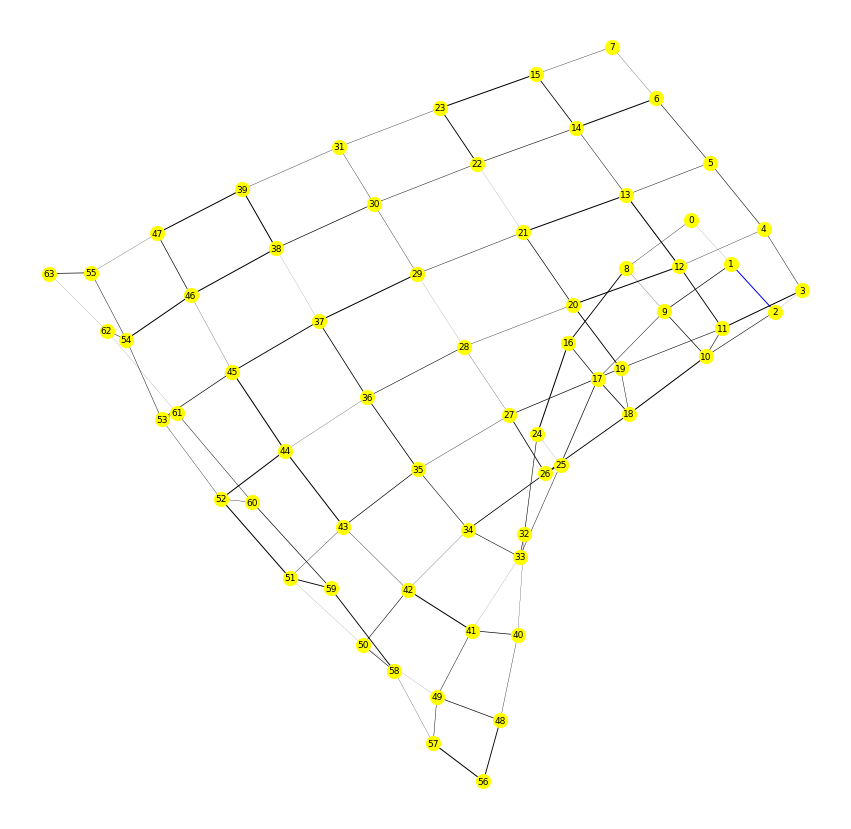

In [30]:
for size in [15, 40, 80]:
    graph_test(type = 'grid', n=size, u_sem = 1, v_sem = 2, sem = 15)

## Wnioski:
* prawa Kirchoffa zostały zachowane w każdym przypadku
* grafy generują się poprawnie